<a href="https://colab.research.google.com/github/SixDevelop/Research-work/blob/main/%D0%9D%D0%98%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт датасета и его анализ



---



**Импорты**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import csv
import collections
import contextlib
import sys
import wave
import librosa
import soundfile as sf

# import webrtcvad
from matplotlib.figure import Figure 
from matplotlib.axes import Axes
from numpy import ndarray
from collections import Counter
import matplotlib.gridspec as gridspec

from mutagen.mp3 import MP3
from mutagen.wavpack import WavPack
# from inaSpeechSegmenter import Segmenter
# from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
import ffmpeg
import os
from pydub import AudioSegment

# from vad import *

Дефолтные данные

In [2]:
path = 'cv-corpus-7.0-2021-07-21/ru/clips/'

**Получение csv таблицы**

In [3]:
full_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/validated.tsv", sep='\t')
full_data.to_csv('validated.csv', index=False)
full_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


**Вывод графика полных данных по полу без очистки таблицы от незаполненных полей**

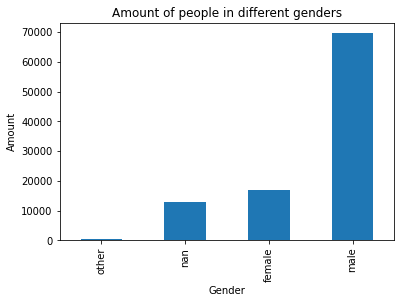

In [4]:
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()


**Исключение ненужных полей из графика**

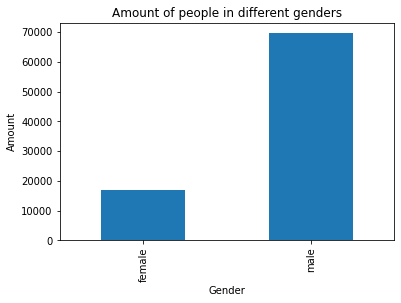

In [5]:

full_data = full_data[full_data.gender.notnull()]
full_data = full_data[full_data.gender != 'other']
full_data.head()
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тренировочных данных

In [6]:
train_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/train.tsv", sep='\t')
train_data.to_csv('train.csv', index=False)
train_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949650.mp3,Теперь слово предоставляется Генеральному секр...,2,0,teens,male,NaN,ru,NaN
1,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949651.mp3,"В португальском языке такие слова, как жизнь, ...",2,0,teens,male,NaN,ru,NaN
2,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949693.mp3,За прошедший год значительно продвинулось суде...,2,0,teens,male,NaN,ru,NaN
3,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949699.mp3,Я предоставляю слово наблюдателю от Святого Пр...,2,0,teens,male,NaN,ru,NaN
4,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949704.mp3,Швейцария стала одним из ее авторов.,2,0,teens,male,NaN,ru,NaN


Вывод графика тренировочных данных без очистки

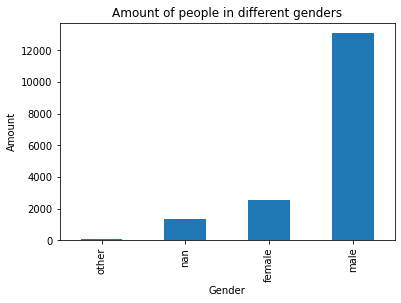

In [7]:
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Исключение ненужных полей из графика

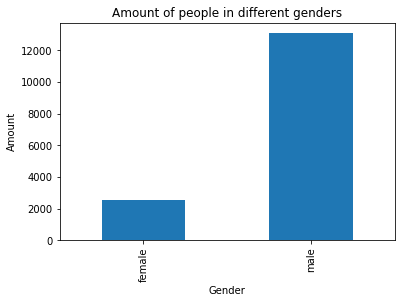

In [8]:
train_data = train_data[train_data.gender.notnull()]
train_data = train_data[train_data.gender != 'other']
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тестовых данных

In [9]:
test_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/test.tsv", sep='\t')
test_data.to_csv('test.csv', index=False)
test_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


Вывод графика тестовых данных без очистки

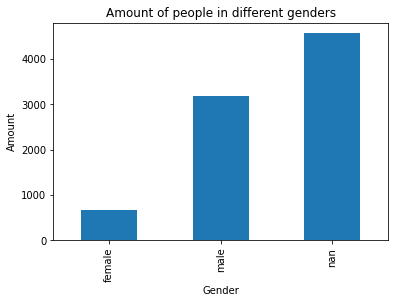

In [10]:
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Очистка тестовых данных

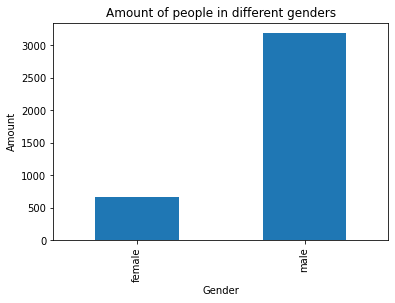

In [11]:
test_data = test_data[test_data.gender.notnull()]
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Получение информации о возрастах в проверенной выборке

In [12]:
full_data.age.value_counts()
# age_full_data = full_data[full_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]




twenties    44310
fourties    16262
thirties    12331
teens        8808
fifties      4160
sixties        65
Name: age, dtype: int64

Вывод данных с очисткой от лиц младше 20 лет

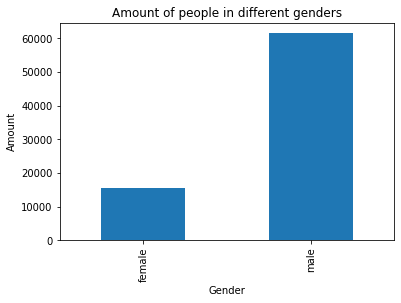

In [13]:
age_full_data = full_data[full_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_full_data = age_full_data[age_full_data.gender.notnull()]
age_full_data = age_full_data[age_full_data.gender != 'other']
age_full_data.head()
list(full_data.columns)
items = Counter(age_full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()


#Вывод точного количества людей по полу в обновившейся выборке

In [14]:
age_full_data.gender.value_counts()

male      61559
female    15569
Name: gender, dtype: int64

Получение массива с путями до нужных файлов


In [15]:
full_pathes = []
for i,row in age_full_data.iterrows():
    full_pathes.append(f"{path}{row['path']}")
print(full_pathes[0])



cv-corpus-7.0-2021-07-21/ru/clips/common_voice_ru_26778765.mp3


Получение длины начальных аудиодорожек

In [16]:
time_full_audio = []
for index in full_pathes:
    audio = MP3(index)
    type(audio)
    time_full_audio.append(audio.info.length)

# for i in range(3):
#     print(time_full_audio[i])

Получение средней длины неизменённых аудиофайлов

In [17]:
print(len(time_full_audio))
mid_full_length = sum(time_full_audio) / len(time_full_audio)
print(mid_full_length)

77128
5.296430224756262


Получение данных о возрастах в тренировочной и тестовой выборках

In [16]:
test_data.age.value_counts()
train_data.age.value_counts()

twenties    8324
thirties    3884
teens       1969
fourties    1258
fifties      125
Name: age, dtype: int64

Вывод данных тестовой выборки без лиц младше 20

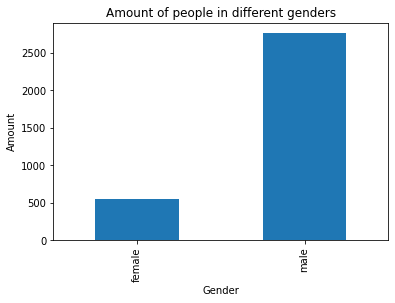

In [15]:
age_test_data = test_data[test_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_test_data = age_test_data[age_test_data.gender.notnull()]
age_test_data = age_test_data[age_test_data.gender != 'other']
age_test_data.head()
list(age_test_data.columns)
items = Counter(age_test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Вывод точного количества человек в получившейся выборке

In [18]:
age_test_data.gender.value_counts()

male      2764
female     555
Name: gender, dtype: int64

Вывод данных тренировочной выборки без лиц младше 20

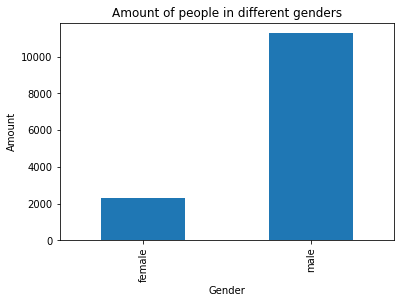

In [16]:
age_train_data = train_data[train_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_train_data = age_train_data[age_train_data.gender.notnull()]
age_train_data = age_train_data[age_train_data.gender != 'other']
age_train_data.head()
list(age_train_data.columns)
items = Counter(age_train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Вывод точного количества человек в получившейся выборке

In [20]:
age_train_data.gender.value_counts()

male      11279
female     2312
Name: gender, dtype: int64

Получение путей до нужных файлов 

In [23]:
test_pathes = []
train_pathes = []
for i,row in age_test_data.iterrows():
    test_pathes.append(f"{path}{row['path']}")

for i,row in age_train_data.iterrows():
    train_pathes.append(f"{path}{row['path']}")

Получение длины тестовой и тренировочной выборок

In [24]:
time_test_audio = []
time_train_audio = []
for index in test_pathes:
    audio = MP3(index)
    type(audio)
    time_test_audio.append(audio.info.length)
for index in train_pathes:
    audio = MP3(index)
    type(audio)
    time_train_audio.append(audio.info.length)

Вывод средней длины аудиодорожек в тестовой и тренировочной выборках

In [25]:
mid_train_length = sum(time_train_audio) / len(time_train_audio)
mid_test_length = sum(time_test_audio) / len(time_test_audio)
print(f"Средняя продолжительность аудио в тренировочной выборке: {mid_train_length}, в тестовой: {mid_test_length}")

Средняя продолжительность аудио в тренировочной выборке: 5.476007872857061, в тестовой: 5.9021469192527976


Вывод пути до wav файлов

In [21]:
dst_full = "cv-corpus-7.0-2021-07-21/ru/wav_clips/full/"
dst_test = "cv-corpus-7.0-2021-07-21/ru/wav_clips/test/"
dst_train = "cv-corpus-7.0-2021-07-21/ru/wav_clips/train/"

In [48]:
strin = full_pathes[0][34:58]
print(strin)

common_voice_ru_26778765


Изменение формата для тестовых файлов

In [ ]:
# import ffmpeg
for index in train_pathes:
    print(index)
    sound = AudioSegment.from_mp3(index)
    name = index[34:58]
    sound.export(f"{dst_train}{name}.wav", format = "wav")
    

Настройка VAD

In [ ]:

audiofile = "cv-corpus-7.0-2021-07-21/ru/wav_clips/test/common_voice_ru_18849869.wav"
audio, sr = librosa.load(audiofile, sr= 8000, mono=True)
print(audio.shape, sr)
clips = librosa.effects.split(audio, top_db=10)
print(clips)
wav_data = []
for c in clips:
    print(c)
    data = audio[c[0]: c[1]]
    wav_data.extend(data)
sf.write('3s.wav', wav_data, sr)

In [4]:
for root, dirs, files in os.walk("data/audio/female"):
  for file in files:
    audiofile = f"data/audio/female/{file}"
    audio, sr = librosa.load(audiofile, sr= 8000, mono=True)
    # print(audio.shape, sr)
    clips = librosa.effects.split(audio, top_db=10)
    # print(clips)
    wav_data = []
    for c in clips:
        print(c)
        data = audio[c[0]: c[1]]
        wav_data.extend(data)
    sf.write(f'data/audio/cut_female/{file}', wav_data, sr)


[4096 8192]
[ 9728 16896]
[19456 20992]
[24576 29184]
[33280 35840]
[ 4608 10752]
[11264 40448]
[41472 49152]
[ 7168 21504]
[22016 24576]
[25088 29696]
[30208 36864]
[37888 38400]
[39424 43520]
[44544 50176]
[ 5632 16896]
[ 3584 13312]
[13824 15872]
[18432 24064]
[ 4608 15872]
[ 4608 15872]
[ 9216 12288]
[ 6656 10752]
[11264 12288]
[13312 19968]
[20480 24064]
[26112 33280]
[35328 35840]
[36352 36864]
[37376 42496]
[43520 45056]
[46080 55808]
[57856 61952]
[65536 67072]
[ 5632 37888]
[38400 44544]
[46080 47104]
[ 4608 18944]
[ 6144 14336]
[14848 22016]
[27136 27648]
[28160 31744]
[33280 34304]
[38400 42496]
[ 3584 13824]
[14336 17408]
[ 7168 31232]
[31744 35328]
[36864 38912]
[42496 45056]
[46080 59904]
[60416 62976]
[63488 66560]
[ 6656 20992]
[21504 25600]
[26112 26624]
[31232 31744]
[32768 33280]
[ 4608 12288]
[15872 17920]
[18944 20992]
[22016 28160]
[31232 34816]
[37888 40960]
[43008 49152]
[49664 51712]
[55808 58368]
[61440 63488]
[64512 65024]
[69120 70656]
[ 3584 28672]
[ 7680 1

In [46]:
for root, dirs, files in os.walk("cv-corpus-7.0-2021-07-21/ru/wav_clips/train"):
  for file in files:
    audiofile = f"cv-corpus-7.0-2021-07-21/ru/wav_clips/train/{file}"
    audio, sr = librosa.load(audiofile, sr= 8000, mono=True)
    # print(audio.shape, sr)
    clips = librosa.effects.split(audio, top_db=10)
    # print(clips)
    wav_data = []
    for c in clips:
        # print(c)
        data = audio[c[0]: c[1]]
        wav_data.extend(data)
    sf.write(f'cv-corpus-7.0-2021-07-21/ru/changed_clips/train/{file}', wav_data, sr)

Вычисление длинны обрезанных тестовых аудиодорожек

In [53]:
time_cut_test_audio = []
for root, dirs, files in os.walk("cv-corpus-7.0-2021-07-21/ru/changed_clips/test"):
    for file in files:
        time = librosa.get_duration(filename = f'cv-corpus-7.0-2021-07-21/ru/changed_clips/test/{file}')
        time_cut_test_audio.append(time)



Вычисление средней длинны порезанных тестовых аудиодорожек


In [54]:
print(len(time_cut_test_audio))
mid_cut_test_length = sum(time_cut_test_audio) / len(time_cut_test_audio)
print(mid_cut_test_length)

3319
3.1962117731244337


Вычисление средней длинны порезанных тренировочных аудиодорожек

In [55]:
time_cut_train_audio = []
for root, dirs, files in os.walk("cv-corpus-7.0-2021-07-21/ru/changed_clips/train"):
    for file in files:
        time = librosa.get_duration(filename = f'cv-corpus-7.0-2021-07-21/ru/changed_clips/train/{file}')
        time_cut_train_audio.append(time)
print(len(time_cut_train_audio))
mid_cut_train_length = sum(time_cut_train_audio) / len(time_cut_train_audio)
print(mid_cut_train_length)

13591
3.235411669487156


# Применение InaSpeechSegmenter на полученных данных

### Составление корректных путей до папок с айдиодорожками

In [22]:
path_test_full_wav = 'cv-corpus-7.0-2021-07-21/ru/wav_clips/test/'
path_test_cut_wav = 'cv-corpus-7.0-2021-07-21/ru/changed_clips/test/'
path_train_full_wav = 'cv-corpus-7.0-2021-07-21/ru/wav_clips/train'
path_train_cut_wav = 'cv-corpus-7.0-2021-07-21/ru/changed_clips/train'
inter_ina = 'inter_ina.csv'
result_ina = 'result_ina.csv'

### Подготовка CNN к работе

In [23]:
seg = Segmenter()

2022-05-09 11:58:56.060052: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
all_data = pd.read_csv("validated.csv")
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
all_data = all_data[all_data.gender == 'female']
train_data = train_data[train_data.gender == 'female']
test_data = test_data[test_data.gender == 'female']
pathes_to_change = []
for i, row in all_data.iterrows():
    checker = 0
    for j, r in train_data.iterrows():
        if row['path'] == r['path']:
            checker = 1
            break
    if checker == 0:
        for j, r in test_data.iterrows():
            if row['path'] == r['path']:
                checker = 1
                break
    if checker == 0:
        pathes_to_change.append(row['path'])
print(len(pathes_to_change))

KeyboardInterrupt: 

In [12]:
print(len(pathes_to_change))
# print(pathes_to_change[0])
path = "cv-corpus-7.0-2021-07-21/ru/clips/"
dst = "cv-corpus-7.0-2021-07-21/ru/wav_clips/full/"
for index in pathes_to_change:
    
    sound = AudioSegment.from_mp3(f"{path}{index}")
    name = index[0:24]
    print(name)
    sound.export(f"{dst}{name}.wav", format = "wav")
    

9440
common_voice_ru_22423332
common_voice_ru_22423333
common_voice_ru_22423334
common_voice_ru_22423335
common_voice_ru_22423336
common_voice_ru_19780920
common_voice_ru_19527452
common_voice_ru_26259346
common_voice_ru_20279470
common_voice_ru_23556097
common_voice_ru_23561301
common_voice_ru_23561370
common_voice_ru_25383950
common_voice_ru_22112693
common_voice_ru_22112695
common_voice_ru_22112697
common_voice_ru_22112698
common_voice_ru_22112700
common_voice_ru_22112721
common_voice_ru_22112722
common_voice_ru_22112723
common_voice_ru_22112724
common_voice_ru_20403688
common_voice_ru_25652654
common_voice_ru_21962131
common_voice_ru_21962133
common_voice_ru_21962135
common_voice_ru_21962138
common_voice_ru_21962139
common_voice_ru_21962163
common_voice_ru_21962164
common_voice_ru_21962165
common_voice_ru_21962166
common_voice_ru_21962167
common_voice_ru_20388724
common_voice_ru_20388751
common_voice_ru_23664200
common_voice_ru_23664202
common_voice_ru_27094268
common_voice_ru_2709

In [28]:

ina_test_data = age_train_data[["path", "gender"]]
ina_test_data.head()
female_table = ina_test_data[ina_test_data.gender == 'female']
male_table = ina_test_data[ina_test_data.gender == 'male']
for i, row in female_table.iterrows():
    new_row = row['path'].replace("mp3", "wav")
    data = pd.DataFrame([new_row], columns=['path'])
    data.to_csv(r"train_female.csv", mode = 'a', header=False, index=False)


In [25]:
for col_name, data in ina_test_data.items():
	print(data)
print(data[1])

1       common_voice_ru_26778765.mp3
14      common_voice_ru_26774623.mp3
15      common_voice_ru_19921774.mp3
16      common_voice_ru_27272384.mp3
19      common_voice_ru_22725772.mp3
                    ...             
8402    common_voice_ru_25157427.mp3
8403    common_voice_ru_25157428.mp3
8404    common_voice_ru_25157430.mp3
8405    common_voice_ru_25157431.mp3
8406    common_voice_ru_25157433.mp3
Name: path, Length: 3319, dtype: object
1       female
14      female
15        male
16        male
19        male
         ...  
8402      male
8403      male
8404      male
8405      male
8406      male
Name: gender, Length: 3319, dtype: object
female


In [ ]:
for i, row in ina_test_data.iterrows():
	new_row = row['path'].replace("mp3", "wav")
	print(f"{row['gender']}  {new_row}" )

	segmentation = seg(f'{path_test_cut_wav}{new_row}')
	seg2csv(segmentation, inter_ina)
	inter_table = pd.read_csv(inter_ina, sep='\t', usecols= ['labels'])
	female_table = inter_table[inter_table.labels == 'female']
	male_table = inter_table[inter_table.labels == 'male']
	if len(male_table) >= len(female_table):
		if len(male_table) > 1:
			male_table = male_table.drop_duplicates(keep = 'first')
		male_table.insert(0, "true", [row['gender']])
		male_table.to_csv(r"result_cut_ina.csv", mode = 'a', header=False, index=False)
	else:
		if len(female_table) > 1:
			female_table = female_table.drop_duplicates(keep = 'first')
		female_table.insert(0, "true", [row['gender']])
		female_table.to_csv(r"result_cut_ina.csv", mode = 'a', header=False, index=False)



	

# Применение Nvidia NeMo

### Импорты

In [13]:
import nemo
NEMO_ROOT = os.getcwd()
print(NEMO_ROOT)
import glob
import subprocess
import tarfile
import wget

BRANCH = 'main'
data_dir = os.path.join(NEMO_ROOT,'data')
os.makedirs(data_dir, exist_ok=True)

/Users/sergey/Documents/GitHub/Research-work


In [20]:
!python scripts/speaker_tasks/scp_to_manifest.py --scp cv-corpus-7.0-2021-07-21/ru/wav_clips/train/train_all.scp --id -2 --out {cv-corpus-7.0-2021-07-21/ru/wav_clips/train/all_manifest.json --split


Traceback (most recent call last):
  File "scripts/speaker_tasks/scp_to_manifest.py", line 21, in <module>
    import librosa as l
ImportError: No module named librosa


# Результаты классификации

### Задание и получение переменных TP FP FN TN

In [65]:
results = pd.read_csv("result_cut_ina.csv")
tp = 0
fp = 0
fn = 0
tn = 0

for i, row in results.iterrows():
    if row['labels'] == 'male' and row['true'] == 'male':
        tp += 1
    if row['labels'] == 'male' and row['true'] == 'female':
        fp += 1
    if row['labels'] == 'female' and row['true'] == 'male':
        fn += 1
    if row['labels'] == 'female' and row['true'] == 'female':
        tn += 1



print(f"true positive: {tp}, \t false positive: {fp}, \t false negative: {fn}, \t, true negative: {tn}")


true positive: 2693, 	 false positive: 64, 	 false negative: 24, 	, true negative: 531


### Вычисление f-меры для полученных выше данных

In [66]:
pre = tp/(tp + fp)
rec = tp/(tp + fn)
f1 = 2 * (pre * rec)/(pre + rec)
print(f"precision = {pre}, \t recall = {rec}, \t f1 = {f1}")

precision = 0.9767863619876678, 	 recall = 0.9911667280088333, 	 f1 = 0.9839240043843626


### Успешность классификации в общем

In [67]:
precision_male = tp/(tp + fn)
precision_female = tn/(tn + fp)
print(f"Точность определения male: {precision_male}, \t female: {precision_female}")

Точность определения male: 0.9911667280088333, 	 female: 0.892436974789916


### PR кривая

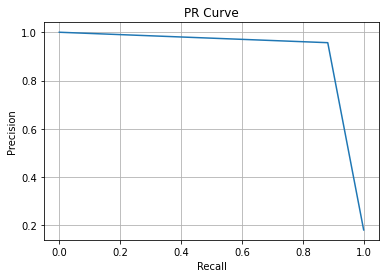

In [60]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
y = []
test = []
score = []
for i, row in results.iterrows():
    if row['true'] == 'male':
        test.append(0)
    else:
        test.append(1)
    if row['labels'] == 'male':
        score.append(0)
    else:
        score.append(1)
    y.append(row['true'])
precision, recall, _ = precision_recall_curve(test, score)
 
# plt.step(recall, precision, color='b', alpha=0.2,
#          where='post')
# plt.fill_between(recall, precision, step='post', alpha=0.2,
#                  color='b')
 
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.ylim([0.0, 1.05])
# plt.xlim([0.0, 1.0])
# plt.title('2-class Precision-Recall curve: AP={0:0.2f}')
plt.figure()
plt.title('PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.plot(recall,precision)
plt.show()

### AUC кривая

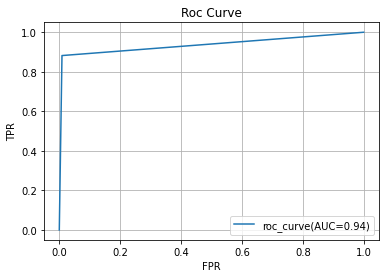

In [61]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test, score)
#print(fpr)
#print(tpr)
plt.figure()
plt.grid()
plt.title('Roc Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')

from sklearn.metrics import auc
auc=auc(fpr, tpr)#AUCCalculation
plt.plot(fpr,tpr,label='roc_curve(AUC=%0.2f)'%auc)
plt.legend()
plt.show()

# Получение гистограмм по датасетам

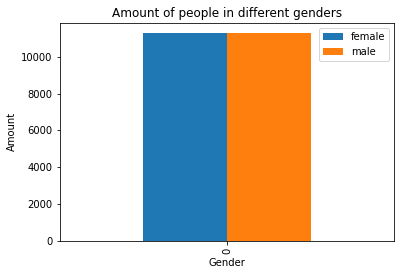

In [10]:
fe_dirname = 'data/audio/female'
ma_dirname = 'data/audio/male'
fe_files = os.listdir(fe_dirname)
ma_files = os.listdir(ma_dirname)

# list(full_data.columns)
# items = Counter(full_data.gender)
srs = pd.DataFrame({'female': [len(fe_files)], 'male': [len(ma_files)]})
# srs = pd.DataFrame(data = [[fe_files],[ma_files]], columns = ['female', 'male'])
# srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

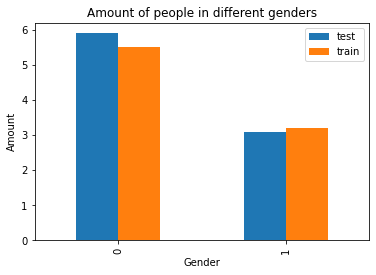

In [11]:
long_tr = 5.5
long_test = 5.9
short_tr = 3.2
short_test = 3.1

srs = pd.DataFrame({'test': [long_test, short_test], 'train': [long_tr, short_tr]})
# srs = pd.DataFrame(data = [[fe_files],[ma_files]], columns = ['female', 'male'])
# srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()